# Credit EDA

## 1. Import Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)



## 2.Reading and Inspection


In [3]:
# Read data from file 'application_data.csv' 
df= pd.read_csv("application_data.csv")

# Preview the first 5 lines of the loaded data
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#Determining the number of rows and columns
df.shape

(307511, 122)

In [5]:
#summary of all the numeric columns in the dataset
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
#Datatypes of each column
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

## 3.Check missing values

In [7]:
#Column-wise null count 
df.isnull().sum()


SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
#Percentage of missing values for all columns 
null_count=round(100*(df.isnull().sum()/len(df.index)),2)
null_count


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [9]:
#Columns with high missing percentage >=50%
null_count=null_count[null_count>=50]
null_count


OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [10]:
len(null_count)

41

Thus, here we can see that there are 41 columns having the highest missing percentage( >=50%)  So here we remove those columns

## 4.Impute/Remove missing values

In [11]:
#Removing those 41 columns which have missing values more than 50%
cols_dropped=([null_count[null_count >=50.00].index])
df.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [12]:
#Rows and Columns after removing columns with high missing percentage
df.shape

(307511, 81)

In [13]:
# Checking the columns after removing high missing values(>=50%)
100*(df.isnull().sum()/len(df.index))

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

Notice that there are columns having almost 48%, 13%, 19% etc. missing values. When dealing with columns, you have two simple choices - either delete or retain the column. If you retain the column, you'll have to treat (i.e. delete or impute) the rows having missing values.

If you delete the missing rows, you lose data. If you impute, you introduce bias.

Apart from the number of missing values, the decision to delete or retain a variable depends on various other factors, such as:

The analysis task at hand,
The usefulness of the variable (based on your understanding of the problem),
The total size of available data (if you have enough, you can afford to throw away some of it)
etc.
Thus, for this exercise, let's remove the columns having more than missing values and which are not necessary for our analysis.

In [14]:
# Drop unnecessary columns from the dataset

Drop_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI']

df.drop(labels=Drop_col,axis=1,inplace=True)

In [15]:
# Checking the columns after dropping unncessary columns

100*(df.isnull().sum()/len(df.index))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

#### AMT_ANNUITY Variable

In [16]:
#Missing values in "AMT_ANNUITY" column
df.AMT_ANNUITY.isnull().sum()

12

In [17]:
#Percentage of missing values in "AMT_ANNUITY" column
float(100*(12/307511))

0.003902299429939092

We can see that 'AMT_ANNUITY' column is having very less percentage of null values and is also a numeric data.  These values can be imputed by the mean of the complete cases of the variable.
Since this column is also having an outlier which is very large we can impute missing values with Median.

#### AMT_GOODS_PRICE variable

In [18]:
#Missing values in "AMT_GOODS_PRICE" column
df.AMT_GOODS_PRICE.isnull().sum()

278

In [19]:
#Percentage of missing values in "AMT_GOODS_PRICE" column
float(100*(278/307511))

0.09040327012692229

AMT_GOODS_PRICE has less percentage of missing values. And also has outliers. These missing values can be imputed with median 

#### EXT_SOURCE_2 variable

In [20]:
df.EXT_SOURCE_2.isnull().sum()

660

In [21]:
float(100*(660/307511))

0.21462646864665005

EXT_SOURCE_2 column has less percentage of missing values. Here we can impute the missing values with 0

#### NAME_TYPE_SUITE Variable

In [22]:
#Missing values in "NAME_TYPE_SUITE" column
df.NAME_TYPE_SUITE.isnull().sum()

1292

In [23]:
#Percentage of missing values in "NAME_TYPE_SUITE" column
100*(1292/307511)

0.42014757195677555

In [24]:
#print the percentage of each NAME_TYPE_SUITE in the data frame df.
df.NAME_TYPE_SUITE.value_counts(normalize= True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [25]:
#find the mode of NAME_TYPE_SUITE in df, check which category is most repeated
name_mode=df.NAME_TYPE_SUITE.mode()[0]
name_mode

'Unaccompanied'

Hence here 'NAME_TYPE_SUITE' being a categorical variable, has about 0.42% of missing values. So here we can impute the missing values with the most popular category which is "Unaccompanied"

#### OCCUPATION_TYPE variable

In [26]:
#Missing values in "OCCUPATION_TYPE" column
df.OCCUPATION_TYPE.isnull().sum()

96391

In [27]:
#Percentage of missing values in "OCCUPATION_TYPE" column
100*(96391/307511)

31.345545362604916

In [28]:
#print the percentage of each OCCUPATION TYPES in the data frame df 
df.OCCUPATION_TYPE .value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [29]:
#find the mode of NAME_TYPE_SUITE in df, check which category is most repeated
occ_mode=df.OCCUPATION_TYPE.mode()[0]
occ_mode

'Laborers'

Here 'OCCUPATION_TYPE' is also a categorical variable, has about 31.3% of missing values. So here we can impute the missing values with the most popular category which is "Laborers"

## 5.Checking Datatypes 

In [30]:
#Preview the first 5 lines of the data
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# I can check the number of unique values is a column
# If the number of unique values <=40: Categorical column
# If the number of unique values in a columns> 50: Continuous

df.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_LIVE_REGION          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REG_REGION_NOT_WORK_REGION          2
CODE_GENDER                         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PR

Now it is clear that which are Continuous and Categorical variables in the dataset givenn. Now we can consider some continuous and categorical variables and change the datatypes if needed

In [32]:
#changing negative ages to positive ages.
df['DAYS_BIRTH']=abs(df['DAYS_BIRTH'])
df['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [33]:
#changing negative values in days to positive days
df['DAYS_EMPLOYED']=abs(df['DAYS_EMPLOYED'])
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [34]:
#changing negative days to positive days.
df['DAYS_REGISTRATION']=abs(df['DAYS_REGISTRATION'])
df['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [35]:
#changing negative days to positive 
df['DAYS_ID_PUBLISH']=abs(df['DAYS_ID_PUBLISH'])
df['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [36]:
#converting the data type of categorical column
df['REG_REGION_NOT_LIVE_REGION'] = df['REG_REGION_NOT_LIVE_REGION'].astype(object)
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION      object
REG_REGION_NOT_WORK_REGIO

In [37]:
#Changing region from int to object
df['REG_REGION_NOT_WORK_REGION'] = df['REG_REGION_NOT_WORK_REGION'].astype(object)

In [38]:
#Changing region from int to object
df['LIVE_REGION_NOT_WORK_REGION'] = df['LIVE_REGION_NOT_WORK_REGION'].astype(object)

In [39]:
#Changing city from int to object
df['REG_CITY_NOT_LIVE_CITY'] = df['REG_CITY_NOT_LIVE_CITY'].astype(object)

In [40]:
#Changing city from int to object
df['REG_CITY_NOT_WORK_CITY'] = df['REG_CITY_NOT_WORK_CITY'].astype(object)

In [41]:
#Changing city from int to object
df['LIVE_CITY_NOT_WORK_CITY']=df['LIVE_CITY_NOT_WORK_CITY'].astype(object)

In [42]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6.Handling Outliers

Major approaches to the treat outliers:

- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### AMT_ANNUITY variable

In [43]:
#describe the AMT_ANNUITY variable of df

df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

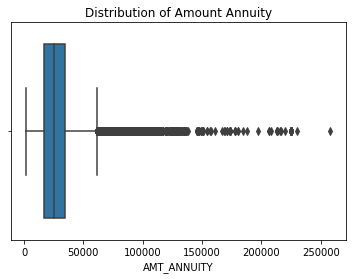

In [44]:
sns.boxplot(df.AMT_ANNUITY)
plt.title('Distribution of Amount Annuity')
plt.show()

As we take a look at AMT_ANNUITY column we can see that there are outliers at 258025.  But there is no much differece between the mean and median, We can impute the outliers with Median here


#### AMT_INCOME variable

In [45]:
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

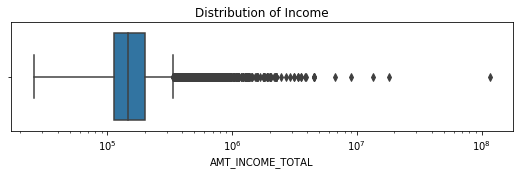

In [46]:
plt.figure(figsize=(9,2))
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.title('Distribution of Income')
plt.show()

In [47]:
df.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In 'AMT_INCOME_TOTAL' column, We can see that there are outlier values at 1.17x10^8. Sometimes, it is beneficial to look into the quantiles instead of the box plot, mean or median. Quantile may give you a fair idea about the outliers. If there is a huge difference between the maximum value and the 95th or 99th quantiles, then there are outliers in the data set.

Total income will definitely vary from person to person. We can cap the outliers here

#### AMT_CREDIT variable

In [48]:
df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

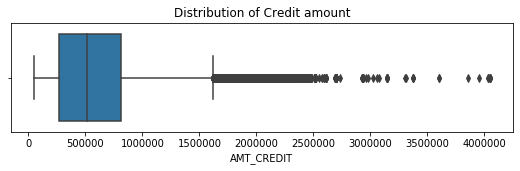

In [49]:
plt.figure(figsize=(9,2))
sns.boxplot(df.AMT_CREDIT)
plt.title('Distribution of Credit amount')
plt.show()

In [50]:
df.AMT_CREDIT.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In this AMT_CREDIT column we can see the outliers after 99th quantile at 4.05x10^6
Amount credited also varies from person to person.

#### DAYS_BIRTH variable

In [51]:
df.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

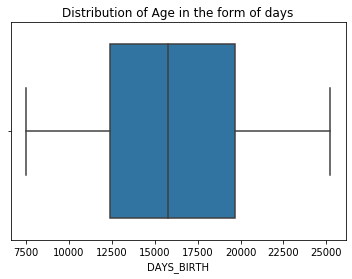

In [52]:
sns.boxplot(df.DAYS_BIRTH)
plt.title('Distribution of Age in the form of days')
plt.show()

DAYS_BIRTH column we can see from box plot that there are no outliers. There is no much difference between mean and median. Which means that all the applications received from the customers are of almost same age. 

#### DAYS_EMPLOYED variable

In [53]:
df.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

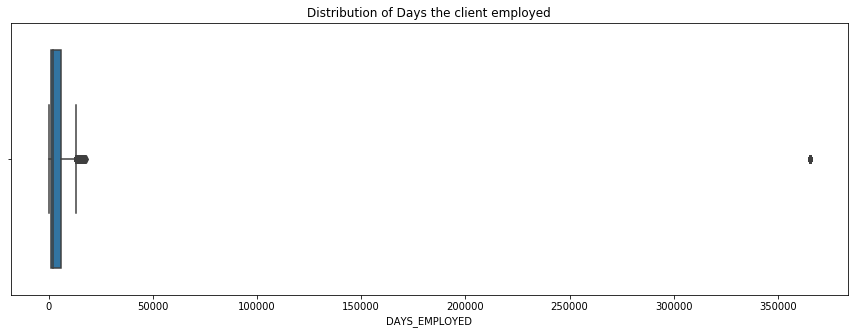

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(df.DAYS_EMPLOYED)
#plt.yscale('log')
plt.title('Distribution of Days the client employed')

plt.show()

DAYS_EMPLOYED column has outliers at 365243. Number of days the person was employed varies from person to person

## 7. Binning Continuous Variable

#### AMT_INCOME_TOTAL variable

In [55]:
#Creating bins for Credit amount

bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [56]:
# Creating bins for income amount

bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [57]:
# Creating bins for days_birth

bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

df['AGE_RANGE']=pd.cut(df['DAYS_BIRTH'],bins,labels=slot)

In [58]:
#Checking bin columns created in df.
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,50-60


## 8.Analysis

### Checking the imbalance Percentage

In [59]:
# Calculating Imbalance percentage
100*(df.TARGET.value_counts())/ (len(df))

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

So TARGET column has 8.07% of 1's which means 8% clients have payment difficulties and 91.92% are having no difficulties

In [60]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
target_1 = df[df['TARGET']==1]
target_0 = df[df['TARGET']==0]

In [61]:
#Dataframe having target values 0
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Medium,Low,40-50


In [62]:
#Dataframe having target values 1
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,Cooking staff,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,High,Low,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,High,Medium,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,Sales staff,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Low,Low,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391.0,4199,NaN,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,60-70


### 8. Univariate Analysis for target =0 and target=1

### Numeric variable

#### Age

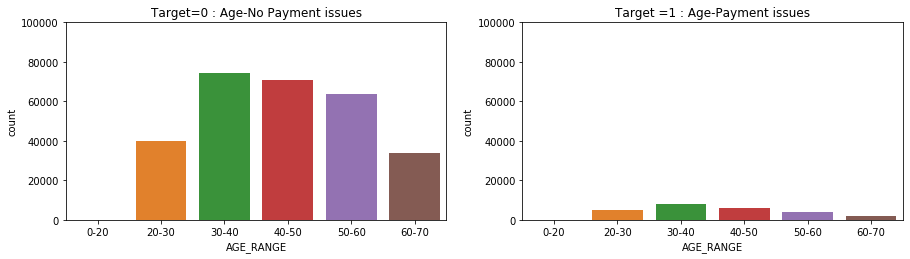

In [63]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Target=0 : Age-No Payment issues')
sns.countplot(target_0['AGE_RANGE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Age-Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AGE_RANGE'])
plt.show()

###### We can observe that customers belonging to age group 30-40 are able to make payment on time and can be considered while lending loan!
##### The customers from 40 to 60 age are also can be considered.

#### Amount credit range

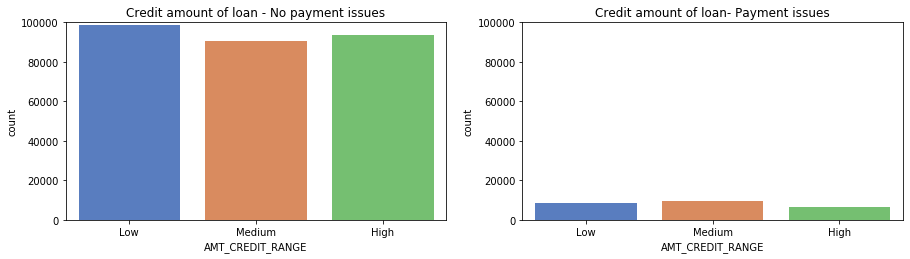

In [64]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(target_0['AMT_CREDIT_RANGE'],palette='muted')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AMT_CREDIT_RANGE'], palette='muted')
plt.show()

###### Customers with less credit and most likely to make payment. Customers having medium and high credit can also be considered while lending the loan


### Categorical Variable

#### Occupation_type

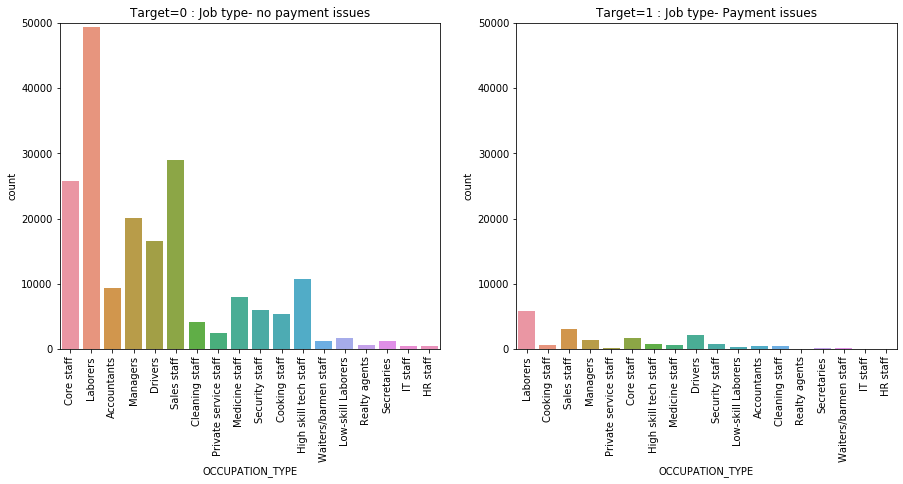

In [65]:
# Categorical variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
#plt.subplots_adjust(wspace=0.5)


sns.countplot(target_0['OCCUPATION_TYPE'])
plt.title('Target=0 : Job type- no payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['OCCUPATION_TYPE'])
plt.title('Target=1 : Job type- Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()



##### The plot clearly shows that labourers are most likely to make payment on time whereas HR staff are less likely to make payment on time

#### Name _Income _Type

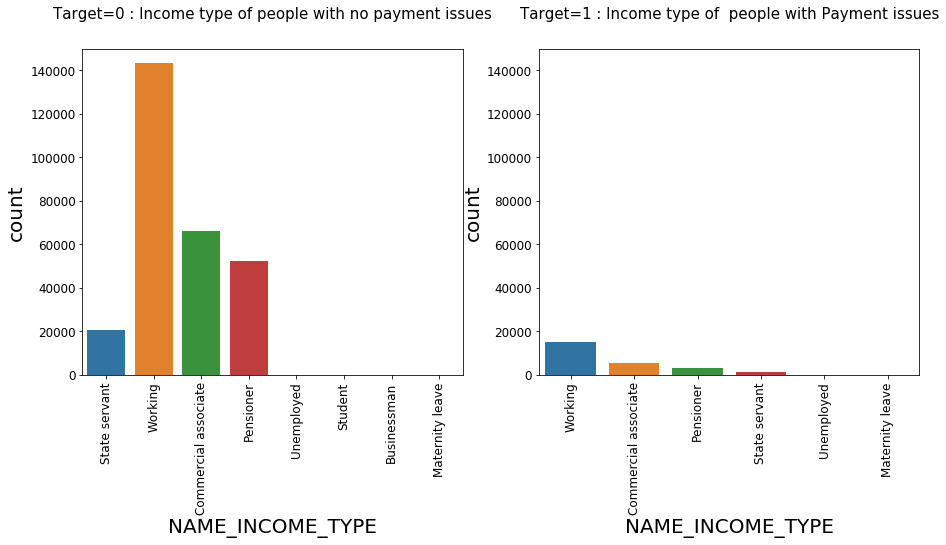

In [66]:
# Categorical variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.subplot(1, 2, 1)
#plt.title()
sns.countplot(target_0['NAME_INCOME_TYPE'].dropna())
plt.title('Target=0 : Income type of people with no payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_INCOME_TYPE'].dropna())
plt.title('Target=1 : Income type of  people with Payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)
plt.show()



##### The plot clearly shows that labourers are most likely to make payment on time whereas HR staff are less likely to make payment on time

### Analyse continuous column with respect to the target column

#### Credit Amount

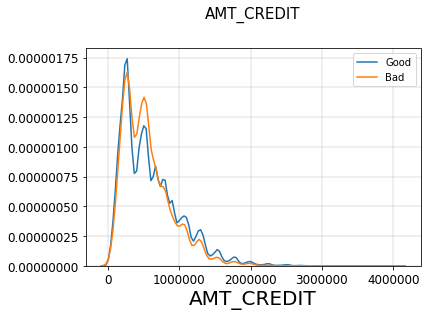

In [67]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_CREDIT'], hist = False, label="Good")# Target = 0
sns.distplot(target_1['AMT_CREDIT'], hist = False, label='Bad')# Taget = 1
plt.title('AMT_CREDIT')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

#### Amount Annuity

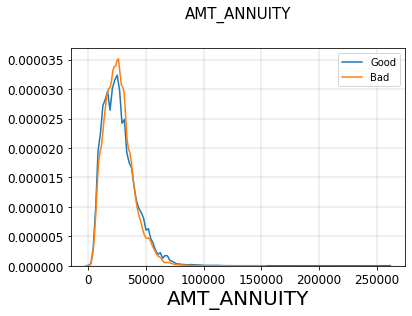

In [68]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_ANNUITY'], hist = False, label="Good")# Target = 0
sns.distplot(target_1['AMT_ANNUITY'], hist = False, label="Bad")# Taget = 1
plt.title('AMT_ANNUITY')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

#### Goods price

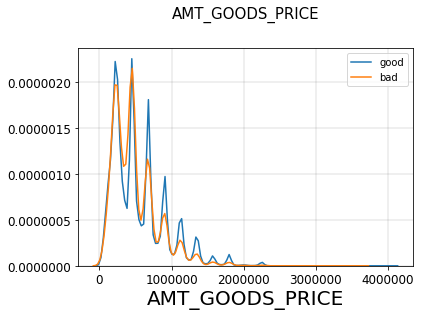

In [69]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_GOODS_PRICE'], hist = False,label= "good")# Target = 0
sns.distplot(target_1['AMT_GOODS_PRICE'], hist = False, label="bad")# Taget = 1
plt.title('AMT_GOODS_PRICE')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

### Analyse Categorical variables with respect to Target variable


In [70]:
#Plot mutiple categorical columns with respect to Target column: Subplot
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
list(enumerate(features))

[(0, 'CODE_GENDER'),
 (1, 'NAME_INCOME_TYPE'),
 (2, 'NAME_EDUCATION_TYPE'),
 (3, 'NAME_FAMILY_STATUS'),
 (4, 'NAME_HOUSING_TYPE'),
 (5, 'OCCUPATION_TYPE')]

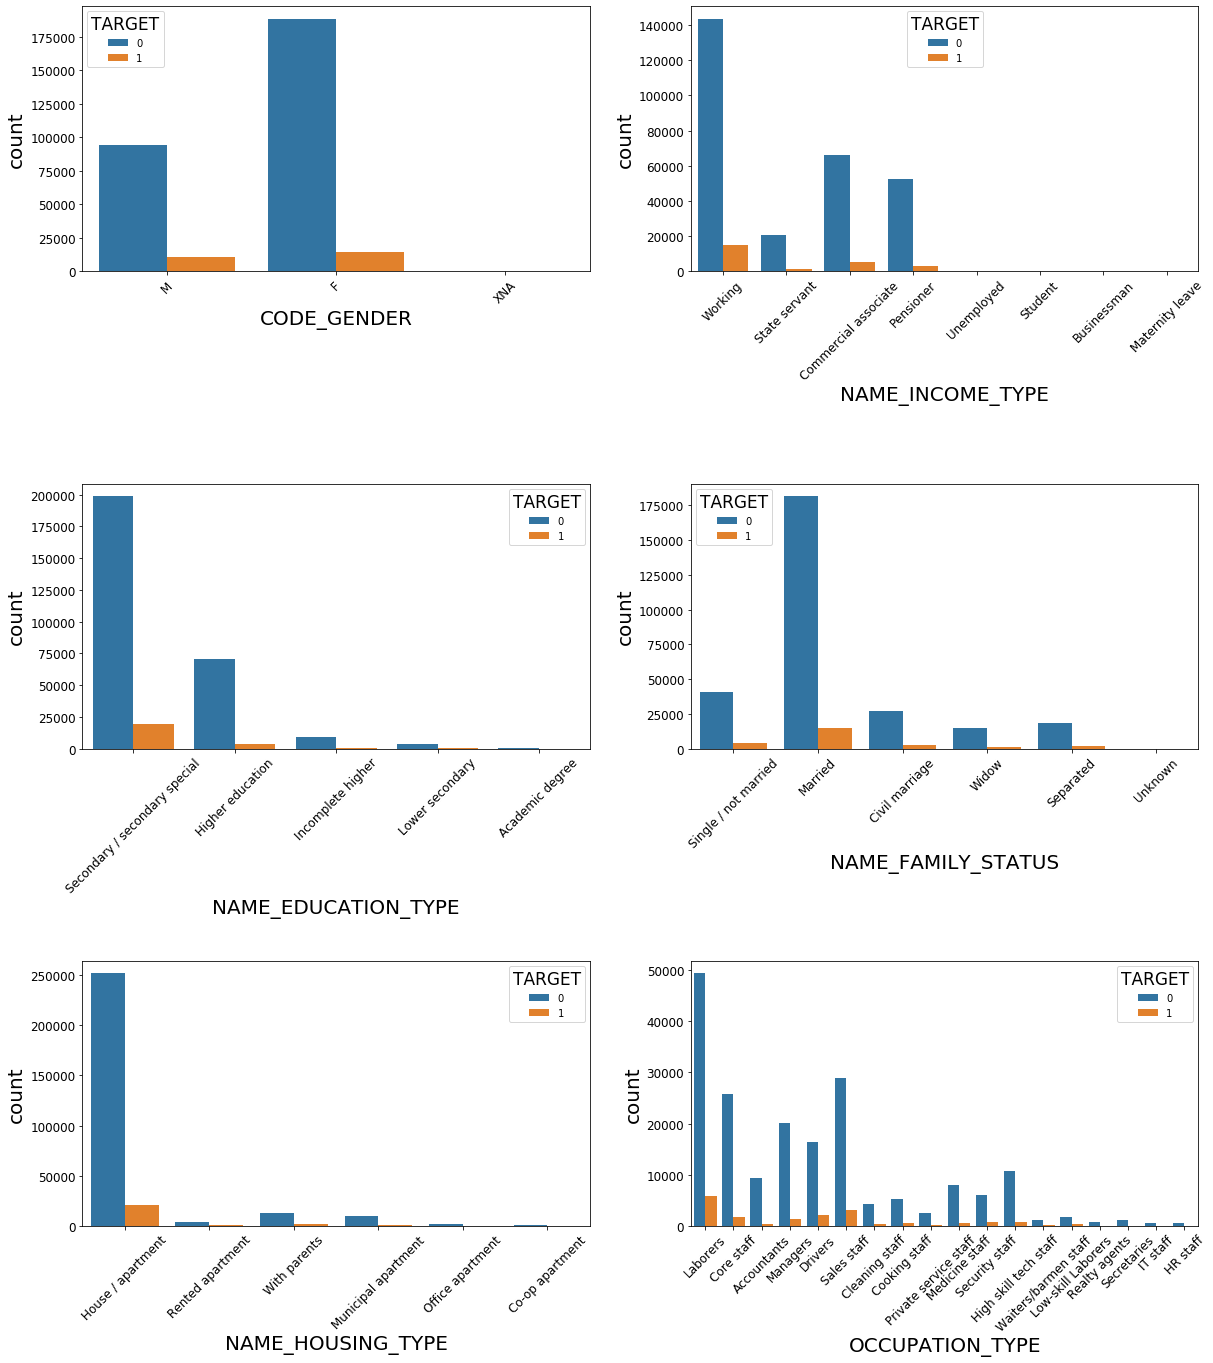

In [71]:
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = df)
    plt.xticks(rotation = 45)
    

##### From the above plot we can see that,
##### Female customers pay loan amount on time and banks can target more female cusytomers for lending loan.
##### Working customers can be targetted to lend loans as they have higher percentage of making payments on time.
##### Customers with secondary education are most likely to make payments when compared to customers with academic degree.
##### Married customers have paid loan amount on time when compared to widows.
##### Customers owning House/apartment are most likely to make payments on time compared to those living in CO-OP apartment.
##### Labourers have high repayement percentage. Hence baks can think of lending small amount loans to them.

## 9.Correlation Matrix

In [72]:
#correlation matrix for all numerical columns
corr=target_0.corr()
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,-0.000115,0.001589,-0.000695,0.000556,-0.000741,0.002382,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,-0.005244,-0.015455,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.076743,0.139598,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.053619,0.129140,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.053589,0.126615,-0.013091,-0.022535,-0.012893,-0.023385,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.068609,-0.015916,0.003649,0.062766,0.135694,-0.000707,-0.021025,-0.000723,-0.023171,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,-0.007198,0.052083,0.001071,0.172814,0.198493,-0.012107,0.005941,-0.011591,0.002255,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,0.001346,NaN,-0.336966,-0.062609,0.047378,-0.012263,0.044565,0.025244,1.000000,0.626114,0.333151,0.271314,-0.095916,0.078158,-0.007726,0.003057,-0.007316,0.000990,-0.004461,-0.002772,0.001069,-0.002855,0.011335,0.072886
DAYS_EMPLOYED,0.001744,NaN,-0.245174,-0.140392,-0.070104,-0.104978,-0.068609,-0.007198,0.626114,1.000000,0.214511,0.276663,-0.095455,-0.028530,0.007272,0.019379,0.007453,0.016383,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169


To get rid of the repeated correlation values between two variables we perform the following steps

In [73]:
#Convert the diagonal and below diagonal values of matrix to False, Whereever False is there is replaced with NaN on execution
corr=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,-0.000115,0.001589,-0.000695,0.000556,-0.000741,0.002382,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,NaN,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,-0.005244,-0.015455,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.076743,0.139598,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.053619,0.129140,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,NaN,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.053589,0.126615,-0.013091,-0.022535,-0.012893,-0.023385,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103827,0.044565,-0.068609,-0.015916,0.003649,0.062766,0.135694,-0.000707,-0.021025,-0.000723,-0.023171,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025244,-0.007198,0.052083,0.001071,0.172814,0.198493,-0.012107,0.005941,-0.011591,0.002255,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626114,0.333151,0.271314,-0.095916,0.078158,-0.007726,0.003057,-0.007316,0.000990,-0.004461,-0.002772,0.001069,-0.002855,0.011335,0.072886
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214511,0.276663,-0.095455,-0.028530,0.007272,0.019379,0.007453,0.016383,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169


In [74]:
#convert it to dataframe
corrdf = corr.unstack().reset_index()
corrdf.head()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [75]:
#Changing the names of solumns
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [76]:
#Drop the columns having the missing data
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.head()

,VAR1,VAR2,Correlation
48,CNT_CHILDREN,SK_ID_CURR,-0.000716
72,AMT_INCOME_TOTAL,SK_ID_CURR,0.001739
74,AMT_INCOME_TOTAL,CNT_CHILDREN,0.027397
96,AMT_CREDIT,SK_ID_CURR,-0.000342
98,AMT_CREDIT,CNT_CHILDREN,0.003081


In [77]:
#Rounding off the values
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf.head()

,VAR1,VAR2,Correlation
48,CNT_CHILDREN,SK_ID_CURR,-0.00
72,AMT_INCOME_TOTAL,SK_ID_CURR,0.00
74,AMT_INCOME_TOTAL,CNT_CHILDREN,0.03
96,AMT_CREDIT,SK_ID_CURR,-0.00
98,AMT_CREDIT,CNT_CHILDREN,0.00


In [78]:
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.head()

,VAR1,VAR2,Correlation
48,CNT_CHILDREN,SK_ID_CURR,0.00
72,AMT_INCOME_TOTAL,SK_ID_CURR,0.00
74,AMT_INCOME_TOTAL,CNT_CHILDREN,0.03
96,AMT_CREDIT,SK_ID_CURR,0.00
98,AMT_CREDIT,CNT_CHILDREN,0.00


In [79]:
#Sorting the correlation values
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)


,VAR1,VAR2,Correlation
398,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
148,AMT_GOODS_PRICE,AMT_CREDIT,0.99
423,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
149,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
124,AMT_ANNUITY,AMT_CREDIT,0.77
224,DAYS_EMPLOYED,DAYS_BIRTH,0.63
123,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
147,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
194,DAYS_BIRTH,CNT_CHILDREN,0.34
99,AMT_CREDIT,AMT_INCOME_TOTAL,0.34


##### We can see that for Target_0 dataframe, Social circle for 30 days and 60 days are most correlated and Goods price and Loan amount credit are highly correlated.Then we have Goods price and amount annuity on 4th place


In [80]:
#For target_1 dataframe we perform the same operations to find correlation
corr = target_1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

                   

,VAR1,VAR2,Correlation
398,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
148,AMT_GOODS_PRICE,AMT_CREDIT,0.98
423,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
124,AMT_ANNUITY,AMT_CREDIT,0.75
149,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
224,DAYS_EMPLOYED,DAYS_BIRTH,0.58
399,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.34
374,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.33
248,DAYS_REGISTRATION,DAYS_BIRTH,0.29
422,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.26


###### From the observation above we can say that for target_1 dataframe Goods price and loan credit amount are most correlated next to social circle observations for different days. So the variables correlated in target_0 dataframe and target_1 dataframe are same with slightly verying correlation values

### 10. Bivariate Analysis for target 0 and target 1

##### Numeric-Numeric Analysis

### Income vs Credit, Goods price vs Credit

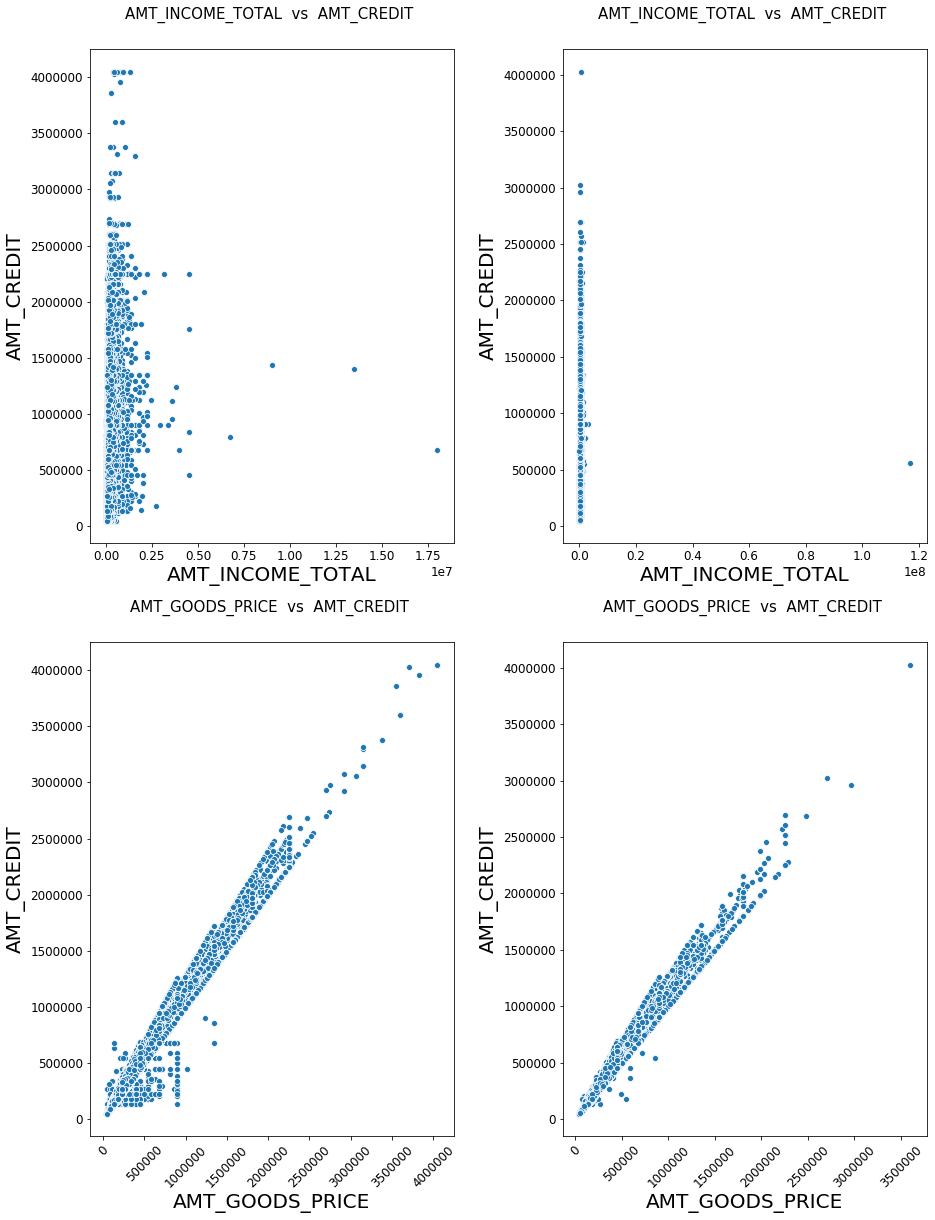

In [81]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(target_0.AMT_INCOME_TOTAL,target_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(target_1.AMT_INCOME_TOTAL,target_1.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')


plt.subplot(2,2,3)
sns.scatterplot(target_0.AMT_GOODS_PRICE,target_0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(target_1.AMT_GOODS_PRICE,target_1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)
plt.show()



###### Those who have paid the loan amount on/within time are more likely to get higher credits than those who didnt pay/did late payments.People who have higher goods price and have made payments on time have higher credits than those with higher goods price but didnt pay loan.

### Numerical categorical analysis

### Income range- Gender

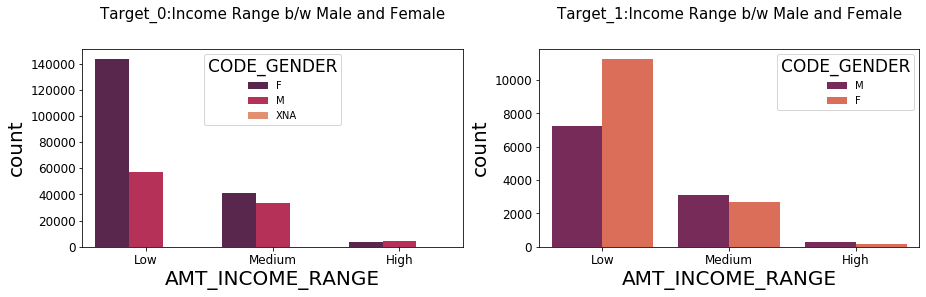

In [82]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Target_0:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_0, palette='rocket')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target_1:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_1,palette='rocket')
plt.show()

##### We  can see that Females with low income don’t have any payment issues.


#### Credit amount vs Education Status

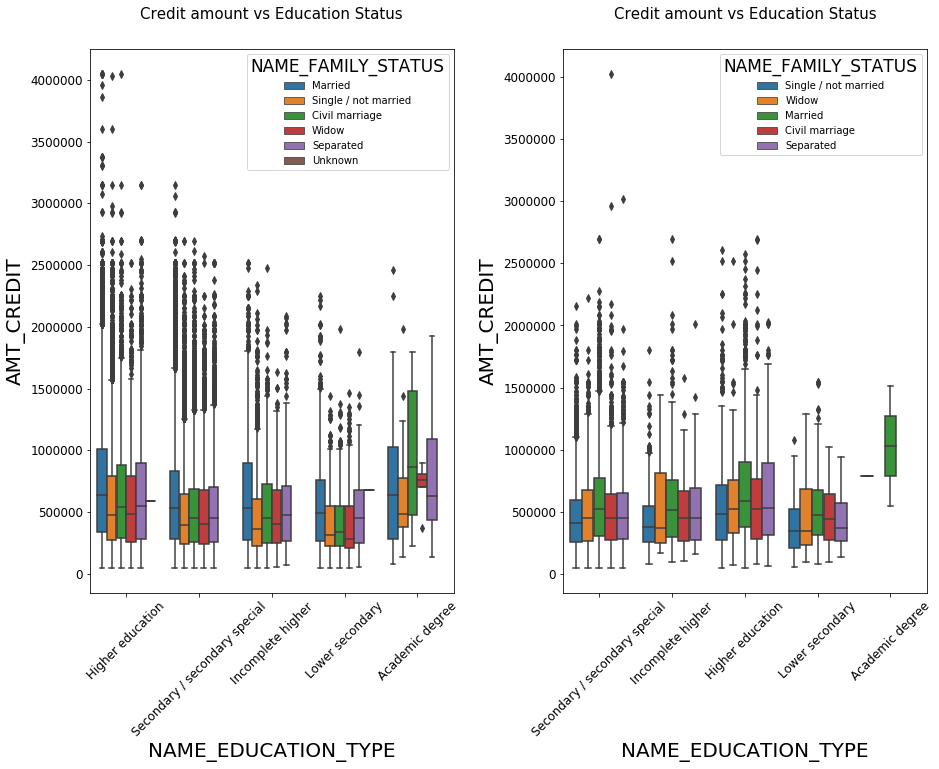

In [83]:
# Box plotting for Credit amount

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)
plt.show()



##### From the above plot,we can see that
##### 1.Some of the highly educated, married person  are having credits higher than those who have done lower secondary eduction.
##### 2.Those with higher eduction have higher credits and are more likely to make payments on time.
##### 3.More number of outliers are seen in higher education.
##### 4.The people with secondary and secndary special eduction are less likely to make payments on time.

### Income vs Education Status

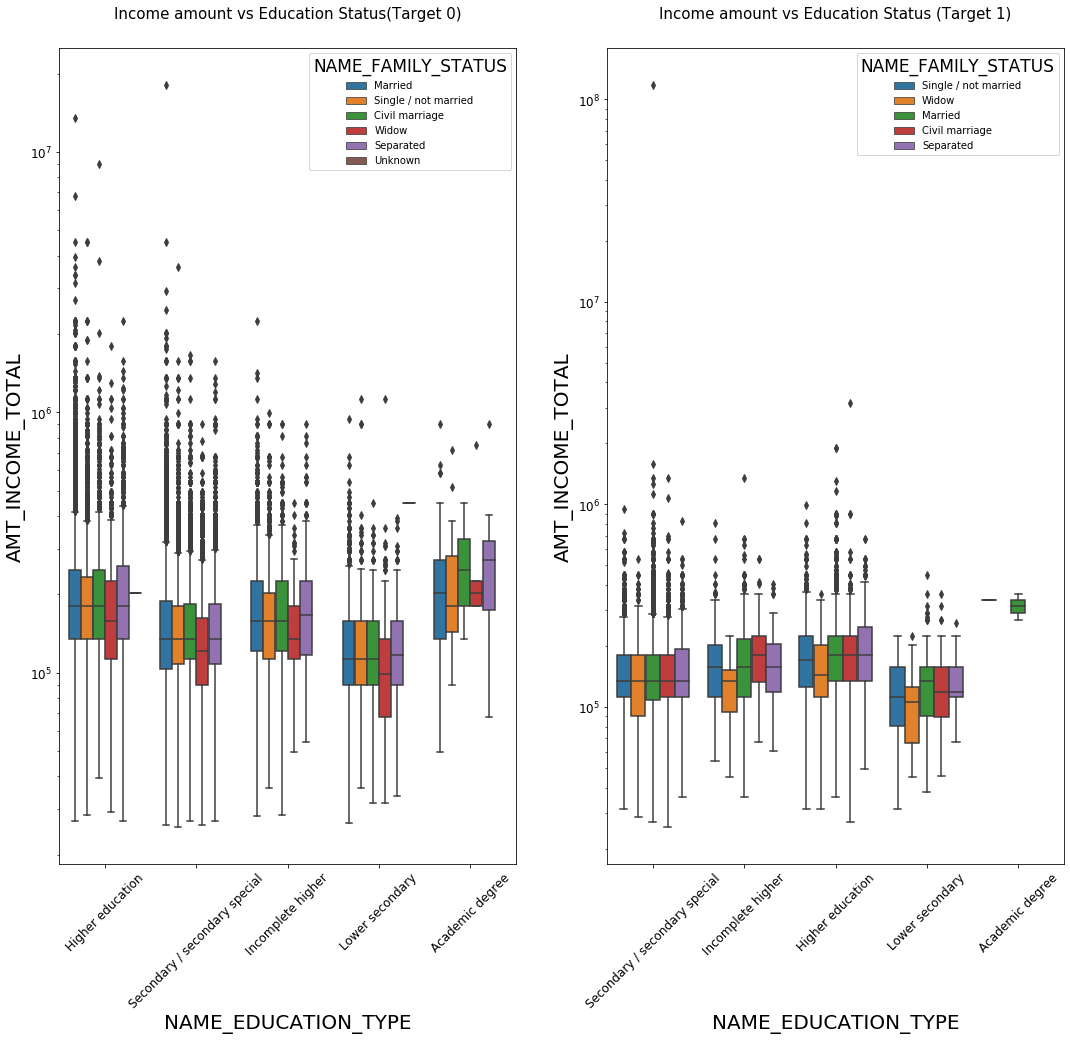

In [84]:

# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(18,15))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status(Target 0)')
plt.xticks(rotation=45)



plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Target 1)')
plt.xticks(rotation=45)
plt.show()




##### From the above plots,
##### 1.we can see that Higher education has many outliers.
##### 2.People with higher eductaion have higher income and dont have difficulties in making loan payment.
##### 3.People with higher education who ave lesser income are unable to pay the loan.
##### Hence we can conclude that,people with Higher income are most likely to make payments.

## 9. Reading the previous application

In [85]:
#Reading the data from file previous_application 
df1=pd.read_csv("previous_application.csv")
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [87]:
#Merge the previous application with the current application data file
merged_df= pd.merge(df, df1, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,NaN,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,MONDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.0251

In [88]:
# Renaming the column names after merging

new_df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,NaN,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,MONDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / a

In [89]:
# Removing unwanted columns for analysis

new_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

new_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,NaN,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,Self-employed,0.321745,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,40-50,1529558,Cash loans,29053.215,450000.0,555723.0,NaN,450000.0,NaN,NaN,NaN,Repairs,Refused,-449,Cash through the bank,LIMIT,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
new_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,NaN,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,Self-employed,0.321745,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,40-50,1529558,Cash loans,29053.215,450000.0,555723.0,NaN,450000.0,NaN,NaN,NaN,Repairs,Refused,-449,Cash through the bank,LIMIT,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


### Univariate Analysis

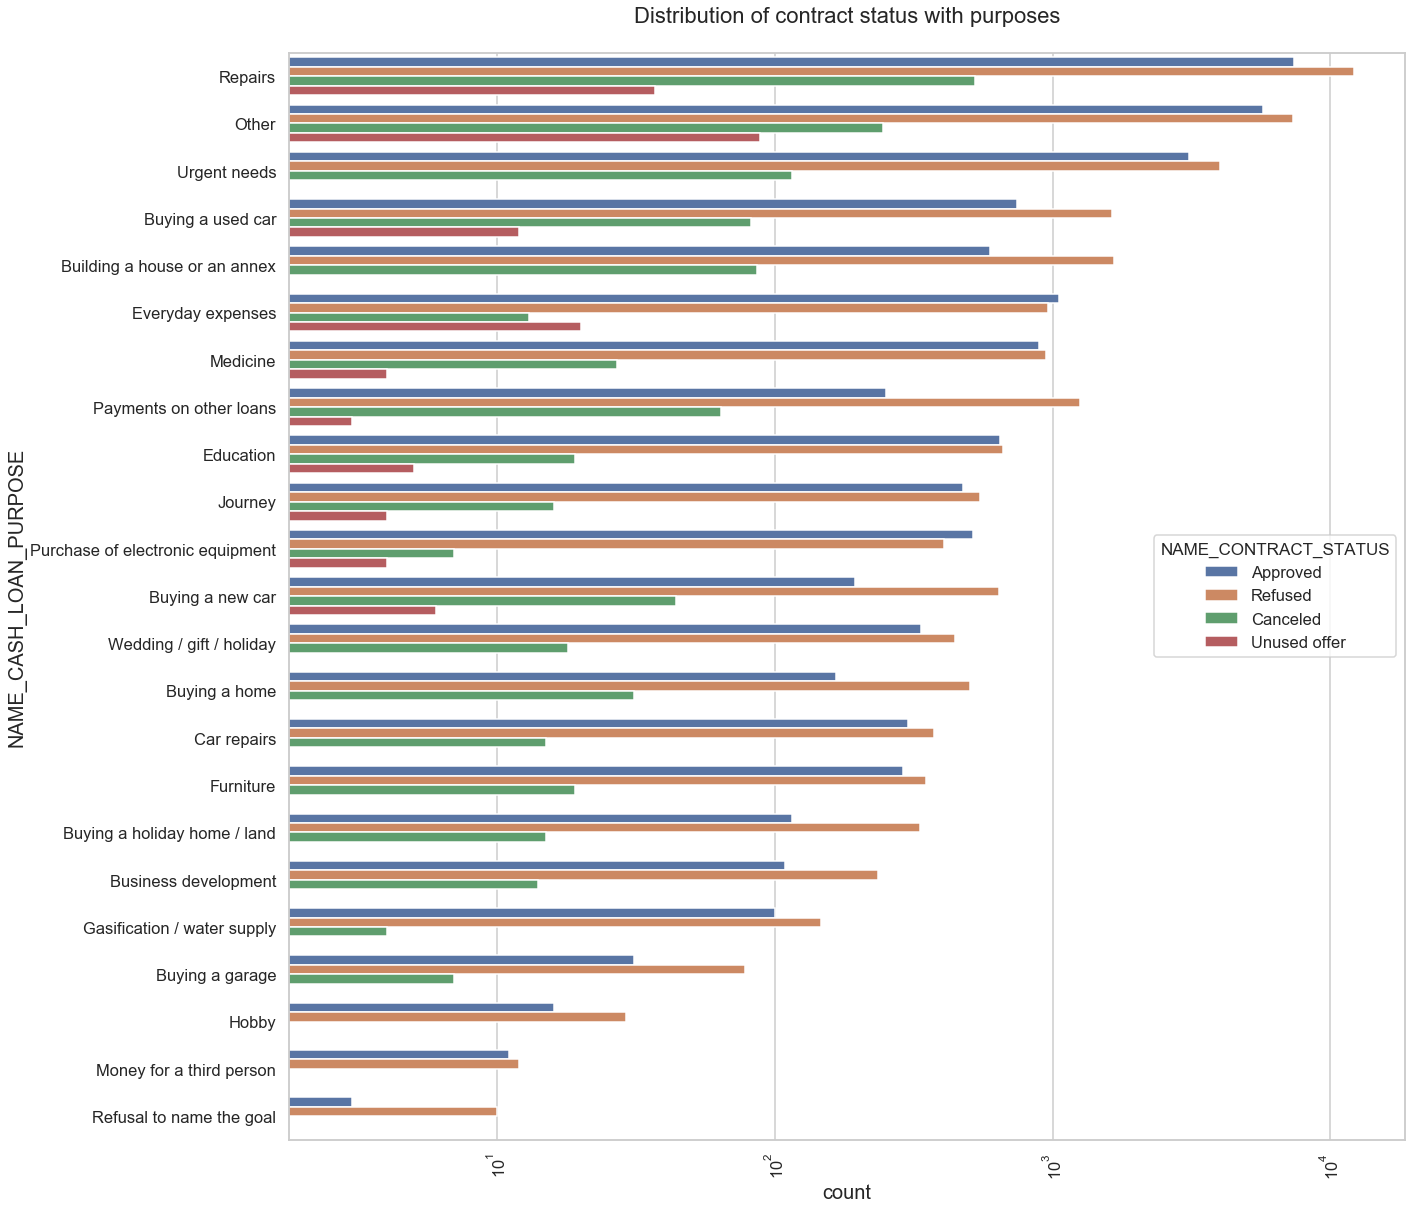

In [91]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = new_df, y='NAME_CASH_LOAN_PURPOSE', order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep')

###### Points to be concluded from above plot:

Most rejection of loans came from purpose 'Repairs'.
For education purposes we have equal number of approves and rejection
PayinG other loans and buying a new car is having significant higher rejection than approves.

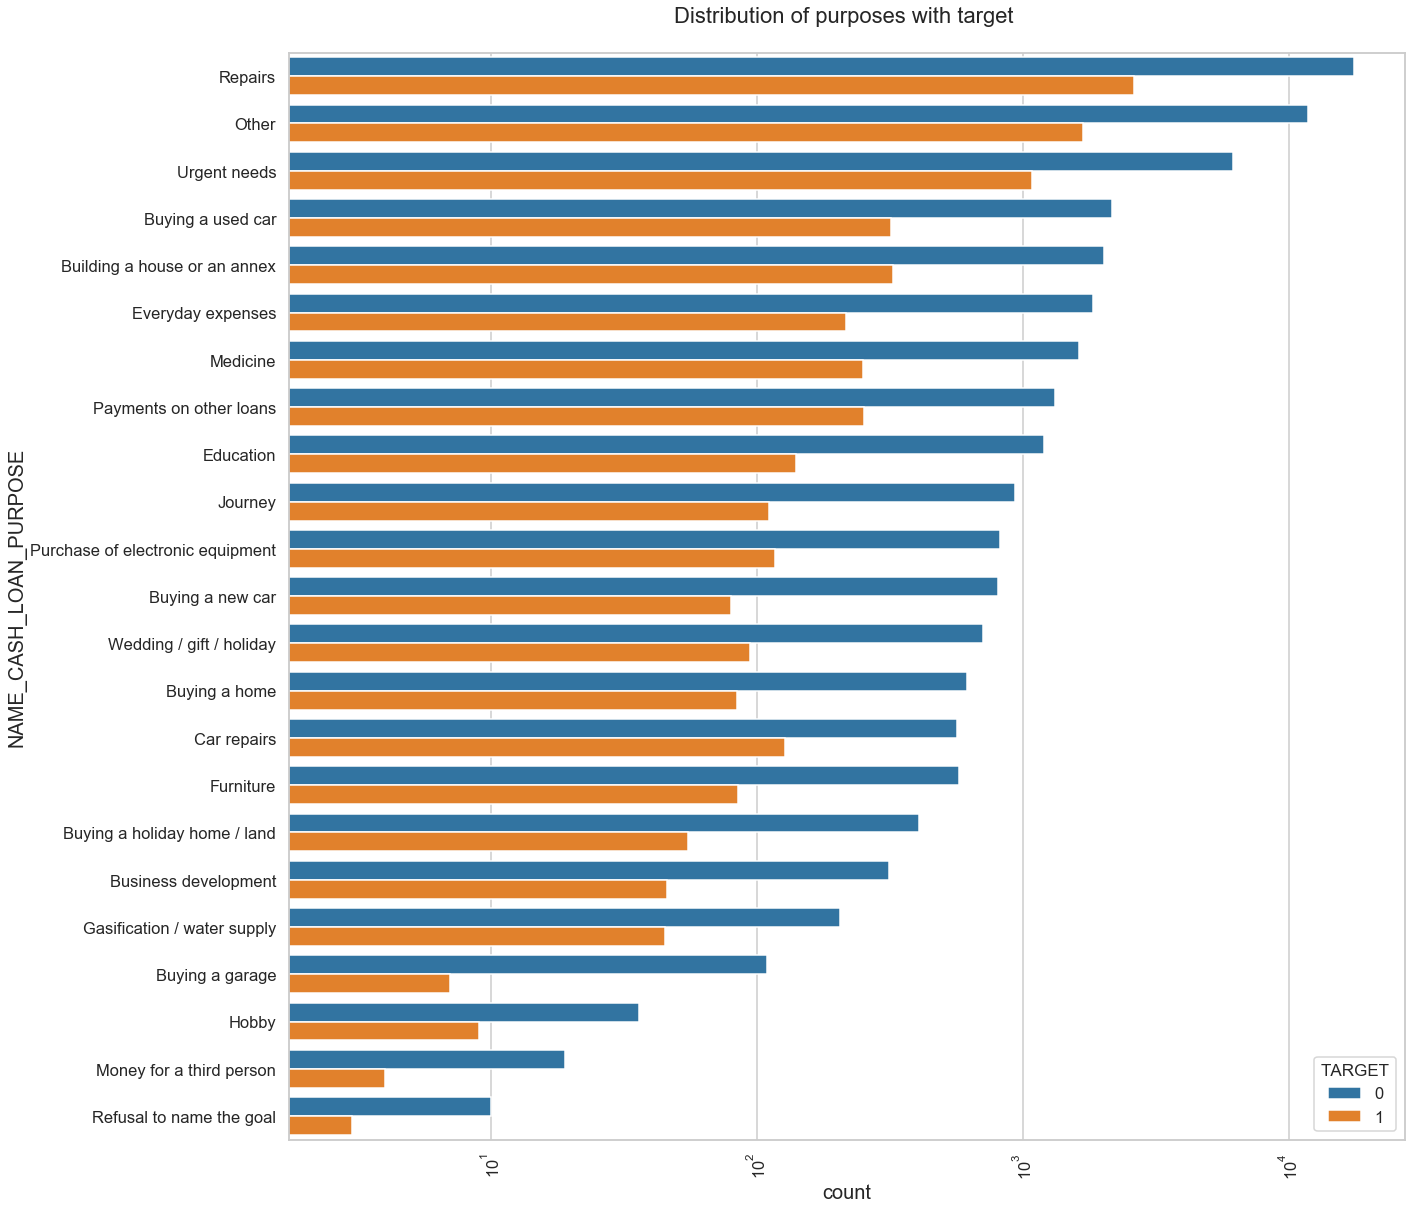

In [92]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df, y= 'NAME_CASH_LOAN_PURPOSE', order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

###### Few points we can conclude from above plot:


Loan purposes with 'Repairs' are facing more difficulites in payment on time.
There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties

### Bivariate Analysis

#### Prev Credit amount vs Loan Purpose

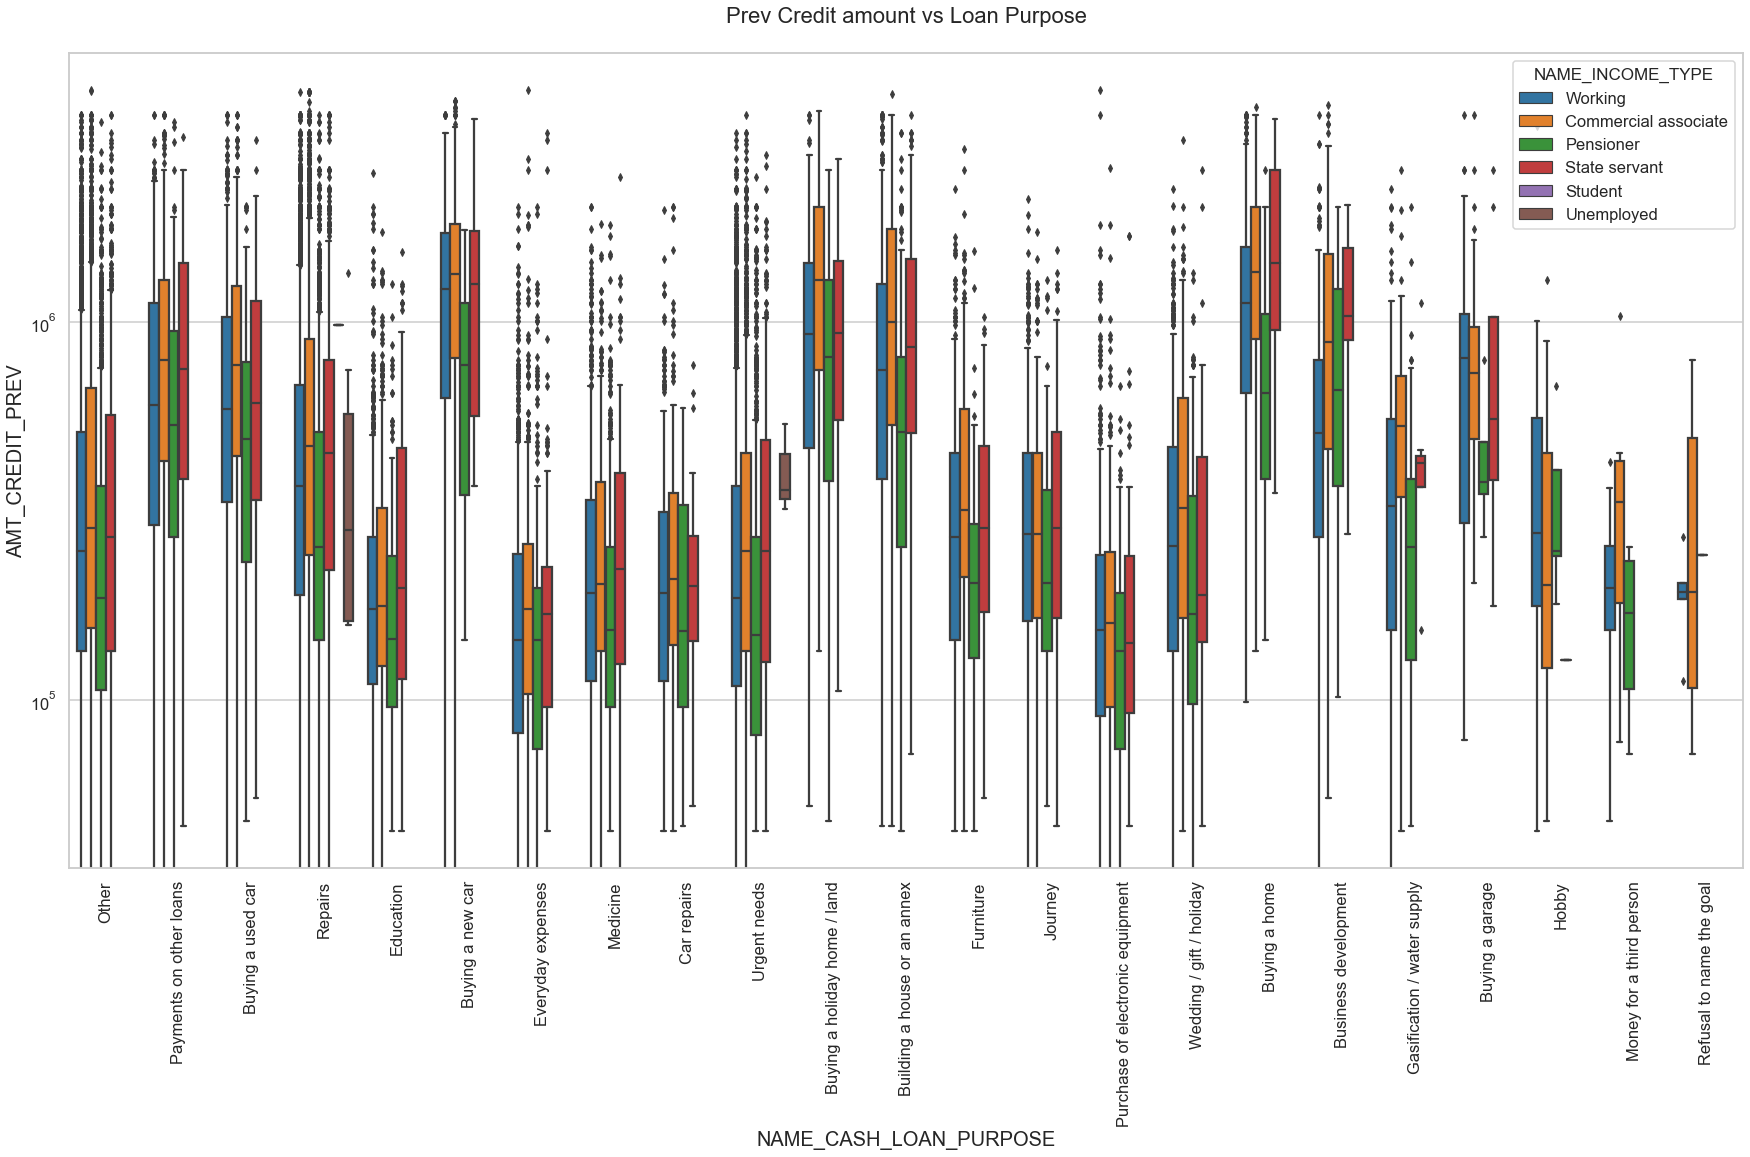

In [93]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data =new_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

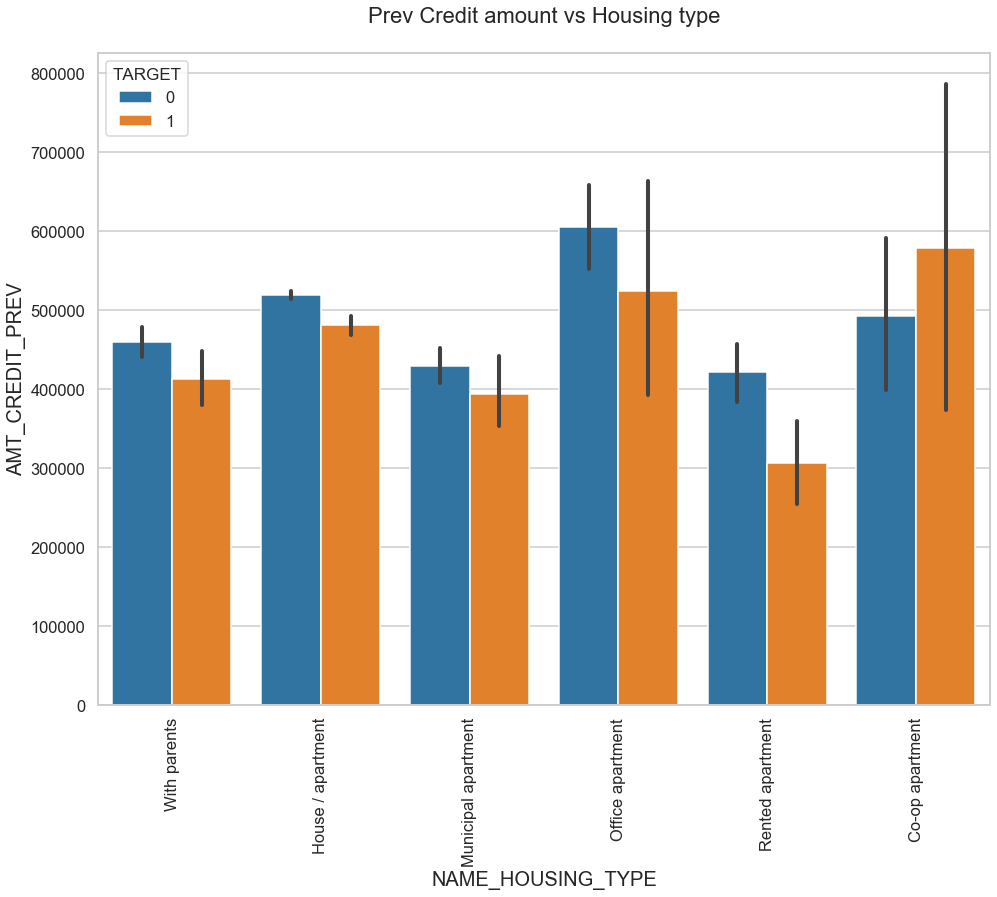

In [94]:

# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',)
plt.title('Prev Credit amount vs Housing type')
plt.show()

##### Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

#### CONCLUSION
##### 1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

#####  2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

##### 3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

##### 4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.